In [9]:
#import STRUTfuncs

In [1]:
from __future__ import division
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import graphlab
%load_ext line_profiler

This non-commercial license of GraphLab Create is assigned to llonini@ricres.org and will expire on November 11, 2016. For commercial licensing options, visit https://turi.com/buy/.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.0.1 started. Logging: /tmp/graphlab_server_1469073014.log


In [2]:
HealthyData = graphlab.SFrame.read_csv('../Datasets/Cbrace/HealthyData.csv')
CBRData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientCBRData.csv')
SCOData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientSCOData.csv')

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 100 lines in 0.368497 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 8375 lines in 0.508108 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 100 lines in 1.12799 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 22354 lines in 1.10892 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 100 lines in 0.59503 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 18762 lines in 0.940608 secs.

In [3]:
CBRData.head(5)

Columns:
	SubjID	int
	Session	int
	Features_  1	float
	Features_  2	float
	Features_  3	float
	Features_  4	int
	Features_  5	int
	Features_  6	int
	Features_  7	int
	Features_  8	float
	Features_  9	float
	Features_ 10	float
	Features_ 11	float
	Features_ 12	float
	Features_ 13	float
	Features_ 14	float
	Features_ 15	float
	Features_ 16	float
	Features_ 17	float
	Features_ 18	int
	Features_ 19	int
	Features_ 20	int
	Features_ 21	int
	Features_ 22	float
	Features_ 23	float
	Features_ 24	float
	Features_ 25	float
	Features_ 26	float
	Features_ 27	float
	Features_ 28	float
	Features_ 29	float
	Features_ 30	float
	Features_ 31	float
	Features_ 32	int
	Features_ 33	int
	Features_ 34	int
	Features_ 35	int
	Features_ 36	float
	Features_ 37	float
	Features_ 38	float
	Features_ 39	float
	Features_ 40	float
	Features_ 41	float
	Features_ 42	float
	Features_ 43	float
	Features_ 44	float
	Features_ 45	float
	Features_ 46	float
	Features_ 47	float
	Features_ 48	float
	Features_ 49	float
	Features_ 50	float
	Features_ 51	float
	Features_ 52	float
	Features_ 53	float
	Features_ 54	float
	Features_ 55	float
	Features_ 56	float
	Features_ 57	float
	Features_ 58	float
	Features_ 59	float
	Features_ 60	float
	Features_ 61	float
	Features_ 62	float
	Features_ 63	float
	Features_ 64	float
	Features_ 65	float
	Features_ 66	float
	Features_ 67	float
	Features_ 68	float
	Features_ 69	float
	Features_ 70	float
	Features_ 71	float
	Features_ 72	float
	Features_ 73	float
	Features_ 74	float
	Features_ 75	float
	Features_ 76	float
	Features_ 77	float
	Features_ 78	float
	Features_ 79	float
	Features_ 80	float
	Features_ 81	float
	Features_ 82	float
	Features_ 83	float
	Features_ 84	float
	Features_ 85	float
	Features_ 86	float
	Features_ 87	float
	Features_ 88	float
	Features_ 89	float
	Features_ 90	float
	Features_ 91	float
	Features_ 92	float
	Features_ 93	float
	Features_ 94	float
	Features_ 95	float
	Features_ 96	float
	Features_ 97	float
	Features_ 98	float
	Features_ 99	float
	Features_100	float
	Features_101	float
	Features_102	float
	Features_103	float
	Features_104	float
	Features_105	float
	Features_106	float
	Features_107	float
	Features_108	float
	Features_109	float
	Features_110	float
	Features_111	float
	Features_112	float
	Features_113	float
	Features_114	float
	Features_115	float
	Features_116	float
	Features_117	float
	Features_118	float
	Features_119	float
	Features_120	float
	Features_121	float
	Features_122	float
	Features_123	float
	Features_124	float
	Features_125	float
	Features_126	float
	Features_127	float
	Features_128	float
	Features_129	float
	Features_130	float
	Features_131	float
	Label	int

Rows: 5

Data:
+--------+---------+-----------------+--------------+--------------+--------------+
| SubjID | Session |   Features_  1  | Features_  2 | Features_  3 | Features_  4 |
+--------+---------+-----------------+--------------+--------------+--------------+
|   1    |    1    |  0.051382320442 |    0.6076    |    0.196     |      0       |
|   1    |    1    | 0.0253933701657 |    0.6076    |    0.1176    |      0       |
|   1    |    1    | 0.0248519337017 |     0.49     |    0.1176    |      0       |
|   1    |    1    | 0.0465635359116 |    0.3136    |    0.0784    |      0       |
|   1    |    1    | 0.0781834254144 |    0.2352    |    0.0784    |      56      |
+--------+---------+-----------------+--------------+--------------+--------------+
+--------------+--------------+--------------+-----------------+-----------------+
| Features_  5 | Features_  6 | Features_  7 |   Features_  8  |   Features_  9  |
+--------------+--------------+--------------+-----------------+-----------------+
|     181      |      0       |      0       |  0.112454267826 | -0.294668590342 |
|     178      |      3       |      0       | 0.0983200079119 | 0.0523105353163 |
|     181      |      0       |      0       | 0.0841222692085 | -0.592549758023 |
|     181      |      0       |      0       | 0.0654386480834 |  -1.01056633159 |
|     

In [4]:
#SUBJECTS IN THE DATABASE
HealthyCodes = HealthyData['SubjID'].unique()
HealthyCodes = HealthyCodes.sort()
print HealthyCodes
PatientCodes = CBRData['SubjID'].unique()
PatientCodes = PatientCodes.sort()
print PatientCodes

[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
[1, 2, 5, 6, 8, 11, 12, 13, 14, 15, 16, 19]


 Most of the errors come from sitting being confounded with standing and viceversa

## Train on Healthy and test on CBR patients


In [7]:
import numpy as np
import math
from math import log
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def convert_from_scikit_learn_to_dic_ite(node_index,is_leaves, children_left,children_right,feature,threshold,value,labels,C):
        
        a = is_leaves[0]
        b = feature[0]
        c = threshold[0]
        if (a):
            d = value[0]  #datapoints of each class in the node
            d2 = np.squeeze(d/np.sum(d))
            d3 = np.zeros(C)
            d3[labels] = d2
            e = labels[np.argmax(d2)]
            return {'splitting_feature' : None,
            'left' : None,
            'right' : None,
            'is_leaf': True,
            'prediction': e,
            'labels_distribution':d3}
    
        else:
            left = children_left[0]-node_index[0]
            if(left==-1):
                left_tree = None
            else:
                left = int(left)
                left_tree = convert_from_scikit_learn_to_dic_ite(node_index[left:],is_leaves[left:], children_left[left:],children_right[left:],feature[left:],threshold[left:],value[left:],labels,C)
            right = children_right[0]-node_index[0]
            if(right==-1):
                right_tree = None
            else:
                right = int(right)
                right_tree = convert_from_scikit_learn_to_dic_ite(node_index[right:],is_leaves[right:], children_left[right:],children_right[right:],feature[right:],threshold[right:],value[right:],labels,C)
            return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': b,
            'threshold'        : c,
            'left'             : left_tree, 
            'right'            : right_tree,
            'labels_distribution': None}


def convert_from_scikit_learn_to_dic_STRUT(tree,threshold,C,Q,target_lf,target_lr,feature):
    # C is the size of the whole labels
    # labels are the labels that are used in the this tree
    labels = range(0,C,1)
    #n_nodes = tree.tree_.node_count
    n_nodes = target_lr.shape[0]
    children_left = target_lf
    children_right = target_lr
    #feature = tree.tree_.feature
    node_index = np.array(range(0,n_nodes))
    Val = Q   #datapoints in node
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1
    # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
    
    return convert_from_scikit_learn_to_dic_ite(node_index,is_leaves, children_left,children_right,feature,threshold,Val,labels,C)

def TransferToSKLsequence(ch_left,ch_right,subset):
    new_left = np.zeros(len(subset))
    new_right = np.zeros(len(subset))
    for i in range(len(subset)):
        (I,) = np.where(subset == ch_left[subset[i]])
        if len(I)==0:
            new_left[i] = -1
        else:
            
            new_left[i] = I
            
        (I,) = np.where(subset == ch_right[subset[i]])
        if len(I)==0:
            new_right[i] = -1
        else:
            new_right[i] = I
    return (new_left,new_right)

def kl (p,q): # Kullback-libler divegence
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)+.0001
    return np.sum(np.where(p != 0,p * np.log10((p / q)), 0))

def jsd(p,q): # Symmetric Kullback-libler divergence
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    m = (p+q)/2
    return (kl(p,m)+kl(m,q))/2

def infogain(yleft,len_left,yright,len_right):
    yparent = (yleft+yright)/2
    N = len_left+len_right
    #compute information gain
    I = entropy(yparent) -( (len_left/N)*entropy(yleft) + (len_right/N)*entropy(yright) )   
    return I

#entropy for multiple classes
def entropy(y):
    y1 = y[y!=0]
    H = -(y1*np.log10(y1)).sum()
    return H 

def partition(Xtarget,ytarget,index_of_data,feature,C,threshold): # divide the data to the left and rightbased on the threshold
    left = index_of_data[Xtarget[index_of_data,feature]<threshold]
    if(len(left)==0):
        left = index_of_data[Xtarget[index_of_data,feature]<=threshold]
    labels_left = ytarget[left]
    qL = np.bincount(labels_left)
    right = index_of_data[Xtarget[index_of_data,feature]>=threshold]
    labels_right = ytarget[right]
    qR = np.bincount(labels_right)
    qR = np.append(qR,np.zeros(np.max([C-qR.shape[0],0])))
    qL = np.append(qL,np.zeros(np.max([C-qL.shape[0],0]))) 
    qL = qL/qL.sum()
    qR = qR/qR.sum()
    return [qL,left,qR,right]

def dg(Sleft,lenleft,Sright,lenright,QL,QR): # DG function as in the paper    
    return 1-(lenleft/(lenleft+lenright))*jsd(Sleft,QL)-(lenright/(lenleft+lenright))*jsd(Sright,QR)
    
def threshold_selection(X,y,S,f,QL,QR,C,verbos): # finding the best threshold
    fvals = np.sort(X[S,f])
    num_data_points = len(fvals)
    N = 10
    Val  = np.array([])
    #Val_swap  = np.array([])
    Val_infogain = np.array([])
    if num_data_points > N-1: 
        I = range(0,num_data_points,np.floor(num_data_points/N).astype(int))
        fvals = fvals[I[1:-1]]
    for i in fvals: #looping through the thresholds
        [Sleft, left, Sright, right] = partition(X,y,S,f,C,i) #find splits based on threshold
        
        #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
        #ax1.plot(QL)
        #ax1.set_title('QL')
        #ax2.plot(Sleft, color='r')
        #ax2.set_title('QprimeL')
        #ax3.plot(QR)
        #ax3.set_title('QR')
        #ax4.plot(Sright, color='r')
        #ax4.set_title('QprimeR')
        Val = np.append(Val,dg(Sleft,len(left),Sright,len(right),QL,QR)) # Here we compute DG between the source dist and target
        #print 'DG = %s' %Val[-1]
        #print 'QL=%s, QR=%s, Sleft=%s, Sright=%s' %(QL,QR,Sleft,Sright)
        Val_infogain = np.append(Val_infogain,infogain(Sleft,len(left),Sright,len(right))) #Compute IG
        #Val_swap = np.append(Val_swap,dg(Sleft,len(left),Sright,len(right),QR,QL)) # this is the divergence measure for each threshold split  
    if(verbos):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='col', sharey='row')
    #ax1.plot(Val)
    #ax1.set_title('DG')
    #ax2.plot(Val_infogain)
    #ax2.set_title('infogain')
        ax1.plot(fvals,Val,'r')
        ax1.hold(True)
        ax1.plot(fvals,Val_infogain)
        ax1.hold(False)
        ax1.set_title('DG and Infogain')
    #plt.show()
    Val[np.isnan(Val)] = min(Val[~np.isnan(Val)])
    Val_infogain[np.isnan(Val_infogain)] = min(Val_infogain[~np.isnan(Val_infogain)])
    #Val_swap[np.isnan(Val_swap)] = min(Val_swap[~np.isnan(Val_swap)])
    th = fvals[np.argmax(Val)] #Maximizing threshold for DG
    th_infogain = fvals[np.argmax(Val_infogain)]
    if(len(S)<50):
        [ql, left, qr, right] = partition(X,y,S,f,C,th_infogain)
    else:
        [ql, left, qr, right] = partition(X,y,S,f,C,th)
    if(verbos):
        ax2.plot(ql)
        ax2.hold(True)
        ax2.plot(qr)
        ax2.hold(False)
        ax2.set_title('Dist Target Data')

        ax3.plot(QL)
        ax3.hold(True)
        ax3.plot(QR)
        ax3.hold(False)
        ax3.set_title('Dist Source Data')
    #print Val
    return [th, ql, qr, left, right]

def classify(tree, x):   
    # if the node is a leaf node.
    if tree['is_leaf']:
        return tree['labels_distribution'] 
    else:
        # split on feature.
        val_split_feature = x[tree['splitting_feature']]
        if val_split_feature < tree['threshold']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'],x)

def forest_posterior(RF,x):

    T = len(RF)  #the number of trees 

    #infer the number of classes
    P0 = classify(RF[0],x)
    C = len(P0)
    
    Pt = np.zeros((T,C)) #matrix of posteriors from each tree (T x Nclasses)
    Pt[0,:] = P0
    for t in range(len(RF))[1:]:
        Pt[t,:] = classify(RF[t],x) 
    return Pt

#classify input based on majority voting of each tree prediction
def forest_classify_majority(RF,x):
        Pt = forest_posterior(RF,x)
        Yt = np.argmax(Pt,axis=1)         
        C,unique_counts = np.unique(Yt,return_counts=True) #the id of classes and number of each
        return C[np.argmax(unique_counts)]   
    
#classify input by averaging posteriors 
def forest_classify_ensemble(RF,x):
    Pt = forest_posterior(RF,x)
    Pforest = Pt.mean(axis=0)
    ypred = np.argmax(Pt.mean(axis=0))
    return ypred

def evaluate_classification_error(RF, X, y, method = None):  
    # Apply the forest_classify(RF, x) to each row in your data
    if method == None:
        ypred = map(lambda x: forest_classify_ensemble(RF,x), X)
        # Once you've made the predictions, calculate the classification error and return it
        mistakes = sum(ypred != y)
        error = mistakes/len(y)
    return error

def value_for_all(estimator,N):
    from scipy.sparse import csr_matrix
    ch_left = estimator.tree_.children_left
    ch_right = estimator.tree_.children_right
    (cl,) = np.where(ch_left!=-1)
    (cr,) = np.where(ch_right!=-1)
    cap = estimator.tree_.capacity
    dis_node = np.zeros((cap,estimator.tree_.n_classes))
    A = np.zeros([cap,cap])
    D = A
    A = csr_matrix(A)
    A[cl,ch_left[cl]] = 1
    A[cr,ch_right[cr]] = 1
    B = A
    C = B
    while(C.sum()!=0):
        C = A*C
        B = B + C
    I,J = B.nonzero()
    D[I,J] = 1
    (I,) = np.where(ch_left==-1)
    dis_node[I,:] = np.squeeze(estimator.tree_.value[I])
    for i in I:
        dis_node[i,:] = dis_node[i,:]/dis_node[i,:].sum()
    (remain1,) = np.where(ch_left!=-1)
    for i in remain1:
        (I,) = np.where(D[i,:]==1)
        dis_node[i,:] = np.sum(np.squeeze(estimator.tree_.value[I]),axis = 0)
        dis_node[i,:] = dis_node[i,:]/dis_node[i,:].sum()
    Dis_node = np.zeros((cap,N))
    Dis_node[:,estimator.classes_.astype(int)] = dis_node
    return Dis_node
    
def STRUCT(Xsource,ysource,Xtarget,ytarget,n_trees,C,verbos = False):
    # Assumption: ysource has all the labels of the problem 
    #estimator = DecisionTreeClassifier(max_features='sqrt',random_state=0,max_depth=2)
    Estimator = RandomForestClassifier(max_features='sqrt',random_state=0,n_estimators=n_trees)
    Estimator = Estimator.fit(Xsource, ysource)
    RF = []
    for rf in range(Estimator.n_estimators):
        estimator = Estimator.estimators_[rf]
        dis_node = value_for_all(estimator,C)
        P = list(np.zeros(estimator.tree_.capacity))
        P[0] = range(len(ytarget))
        Q = list(np.zeros(estimator.tree_.capacity))
        Q[0] = dis_node[0,:]
        thresh = np.zeros(estimator.tree_.capacity)
        remain = [0]
        subset = []
        while(len(remain)!=0):
            i = remain[0]
            LF = estimator.tree_.children_left
            LR = estimator.tree_.children_right
            index_left = LF[i]
            index_right = LR[i]
            if(index_left!=-1):
                QL = dis_node[index_left,:]
                QR = dis_node[index_right,:]
                f = estimator.tree_.feature[i]
                [th, ql, qr, left, right] = threshold_selection(Xtarget,ytarget,np.array(P[i]),f,QL,QR,C,verbos)
                thresh[i] = th
                P[index_left] = left
                P[index_right] = right
                Q[index_left] = ql
                Q[index_right] = qr
                if(len(left)!=0):
                    remain = np.append(remain,index_left)
                if(len(right)!=0):
                    remain = np.append(remain,index_right)
                if(len(left)>0 and len(right)>0):
                    subset.append(i)
            remain = remain[1:]
        lf =  LF[subset]
        lr =  LR[subset]
        subset = np.append(subset,lf)
        subset = np.append(subset,lr)
        subset = np.unique(np.sort(subset))
        subset = np.array(subset)
        (target_lf,target_lr) = TransferToSKLsequence(np.array(LF),np.array(LR),subset)
        ST = convert_from_scikit_learn_to_dic_STRUT(estimator,thresh,C,Q,target_lf,target_lr,estimator.tree_.feature[subset])
        RF.append(ST)
    return RF

In [5]:
col_names = HealthyData.column_names()
label_cols = col_names[-1:] #the : is used to return a list with one element 
feature_cols = col_names[2:-1]

Xtrain = HealthyData.select_columns(feature_cols).to_numpy()
ytrain = HealthyData.select_columns(label_cols).to_numpy()
ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array

RF = RandomForestClassifier(n_estimators=10)
RF = RF.fit(Xtrain,ytrain)

#test on each patient (CBR)
#PatientCodes = CBRData['SubjID'].unique()
#PatientCodes = PatientCodes.sort()
PatientCodes = np.array([1, 2, 5, 6, 8, 11, 14, 15, 16, 19]) #all patient with 4 sessions in CBR 
SOacc = np.zeros(len(PatientCodes))
k = 0

for s in PatientCodes:
    test = CBRData[(CBRData['SubjID'] == s)  & (CBRData['Session'] != 1)] #keep out one session (used later for target)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1) #to squeeze last dimension and obtain a 1D array

    print 'Test on Patient %s'%s
    print 'Train samples = %s, Test samples = %s'%(len(ytrain),len(ytest))
    ypred = RF.predict(Xtest)

    #    acc = sum(ypred == ytest)
    #    CVacc[k] = acc/len(ytest)

    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    SOacc[k] = BAcc

    print 'BAcc = %s'%SOacc[k]
    k = k+1

print '\nmean acc Source only = %s'%SOacc.mean()


Test on Patient 1
Train samples = 8375, Test samples = 1177
BAcc = 0.383916382907
Test on Patient 2
Train samples = 8375, Test samples = 1228
BAcc = 0.321884511072
Test on Patient 5
Train samples = 8375, Test samples = 1468
BAcc = 0.428088587201
Test on Patient 6
Train samples = 8375, Test samples = 2246
BAcc = 0.605924879857
Test on Patient 8
Train samples = 8375, Test samples = 926
BAcc = 0.294756143737
Test on Patient 11
Train samples = 8375, Test samples = 1207
BAcc = 0.453916872403
Test on Patient 14
Train samples = 8375, Test samples = 1527
BAcc = 0.47469576857
Test on Patient 15
Train samples = 8375, Test samples = 3177
BAcc = 0.467329935949
Test on Patient 16
Train samples = 8375, Test samples = 1354
BAcc = 0.665314940863
Test on Patient 19
Train samples = 8375, Test samples = 1328
BAcc = 0.560226171326

mean acc Source only = 0.465605419388


## Now test the STRUT - Use one session of data from each patient as target and the remaining as his test
* Need to compute CV error on each session

In [ ]:
SOacc = np.zeros(len(PatientCodes)) #to store err when using source only
STRUTacc = np.zeros(len(PatientCodes)) #to store err when using source + Target with STRUT
k = 0
for s in PatientCodes:

    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    print 'Test on Patient %s,  '%s
    print '# of classes = %s'%Nclasses
    print 'Source samples = %s, Target samples = %s, Test samples = %s'%(len(ytrain),len(ytarget),len(ytest))

    #train forest using STRUT
    if s==1: #profile code for 1 subj
        %lprun -s -f STRUCT -T SpeedStrut.txt STRUCT(Xtrain,ytrain,Xtarget,ytarget,n_trees=10,C=Nclasses,verbos = True) 
      
    STRUT_RF = STRUCT(Xtrain,ytrain,Xtarget,ytarget,n_trees=10,C=Nclasses,verbos = True)

    #balanced accuracy
    acc_c = 0
    ypred = np.asarray(map(lambda x:forest_classify_ensemble(STRUT_RF,x),Xtest))
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)

    STRUTacc[k] = acc_c/Nclasses
    print 'Accuracy w STRUT = %s\n'%STRUTacc[k]
    k = k+1

print 'mean Acc - Source only = %s'%SOacc.mean()
print 'mean Acc w STRUT = %s'%STRUTacc.mean()

Test on Patient 1,  
# of classes = 5
Source samples = 8375, Target samples = 501, Test samples = 1177


/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:255: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/luca/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
/Users/luca/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:66: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/luca/anaconda/lib/python2.


*** Profile printout saved to text file u'SpeedStrut.txt'. 
Accuracy w STRUT = 0.627240110399

Test on Patient 2,  
# of classes = 5
Source samples = 8375, Target samples = 230, Test samples = 1228
Accuracy w STRUT = 0.418331987806

Test on Patient 5,  
# of classes = 5
Source samples = 8375, Target samples = 305, Test samples = 1468
Accuracy w STRUT = 0.4928639829

Test on Patient 6,  
# of classes = 4
Source samples = 8375, Target samples = 670, Test samples = 2246


IndexError: index 4 is out of bounds for axis 1 with size 4

In [68]:
def TransferToSKLsequence(ch_left,ch_right,subset):
    new_left = np.zeros(len(subset))
    new_right = np.zeros(len(subset))
    for i in range(len(subset)):
        (I,) = np.where(subset == ch_left[subset[i]])
        if len(I)==0:
            new_left[i] = -1
        else:
            
            new_left[i] = I
            
        (I,) = np.where(subset == ch_right[subset[i]])
        if len(I)==0:
            new_right[i] = -1
        else:
            new_right[i] = I
    return (new_left,new_right)

ch_left = np.array([ 1,  2,  3, -1,  5, -1, -1,  8,  9, -1, -1, 12, -1, -1, 15, 16, 17, -1, -1, 20, -1, -1, 23, 24, -1, -1, 27, -1, -1])
ch_right = np.array([14, 7, 4, -1,  6, -1, -1, 11, 10, -1, -1, 13, -1, -1, 22, 19, 18, -1, -1, 21, -1, -1, 26, 25, -1, -1, 28, -1, -1])
subset = np.array([ 0,  1,  2,  7,  8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26])
(a,b) = TransferToSKLsequence(ch_left,ch_right,subset)
print a
print b

[  1.   2.  -1.   4.  -1.   6.  -1.  -1.   9.  10.  11.  -1.  -1.  14.  -1.
  -1.  17.  -1.  -1.]
[  8.   3.  -1.   5.  -1.   7.  -1.  -1.  16.  13.  12.  -1.  -1.  15.  -1.
  -1.  18.  -1.  -1.]


In [58]:
ch_left = np.array([ 1,  2,  3, -1,  5, -1, -1,  8,  9, -1, -1, 12, -1, -1, 15, 16, 17, -1, -1, 20, -1, -1, 23, 24, -1, -1, 27, -1, -1])
ch_right = np.array([14, 7, 4, -1,  6, -1, -1, 11, 10, -1, -1, 13, -1, -1, 22, 19, 18, -1, -1, 21, -1, -1, 26, 25, -1, -1, 28, -1, -1])
subset = np.array([ 0,  1,  2,  7,  8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26])
print ch_left[subset[1]]
I = (subset == ch_left[subset[1]])
print I


2
[False False  True False False False False False False False False False
 False False False False False False False]


In [57]:
type(subset)

list

## Train a forest on Target data only

In [45]:
TOacc = np.zeros(len(PatientCodes)) 
Ntarget = np.zeros(len(PatientCodes))
k = 0
for s in PatientCodes:
    
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    Ntarget[k] = len(ytarget)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtarget,ytarget)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    TOacc[k] = BAcc
    print 'Patient %s, BAcc = %s'%(s,TOacc[k])
    k = k+1

print '\nmean acc Target only = %s'%TOacc.mean()

Patient 1, BAcc = 0.804935944011
Patient 2, BAcc = 0.556784549917
Patient 5, BAcc = 0.653978658868
Patient 6, BAcc = 0.554037603531
Patient 8, BAcc = 0.534470168882
Patient 11, BAcc = 0.498515569636
Patient 14, BAcc = 0.565454908539
Patient 15, BAcc = 0.581813263402
Patient 16, BAcc = 0.558014499038
Patient 19, BAcc = 0.706019324856

mean acc Target only = 0.601402449068


<function matplotlib.pyplot.show>

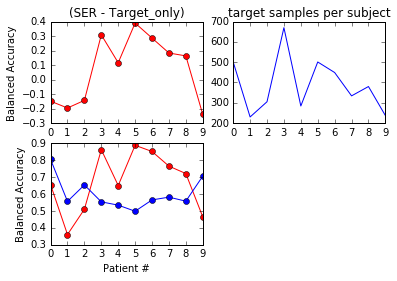

In [52]:
plt.figure(1)
plt.subplot(221)
plt.plot(SERacc-TOacc,'ro-')
plt.xlabel('Patient #')
plt.ylabel('Balanced Accuracy')
plt.title('(SER - Target_only)')

plt.subplot(223)
plt.plot(SERacc,'ro-',TOacc,'bo-')
plt.xlabel('Patient #')
plt.ylabel('Balanced Accuracy')
#plt.legend(['w SER','Target only'])

plt.subplot(222)
plt.plot(Ntarget)
plt.title('target samples per subject')
plt.show

The SER can boost accuracy in some cases, while for others it is outperformed by a model trained on the target data only. Also, the target session matters (e.g. using session 4 as the target drastically decreases the results)

In [49]:
np.corrcoef(SERacc,Ntarget)

array([[ 1.        ,  0.78083249],
       [ 0.78083249,  1.        ]])

* Need to add a confusion matrix

## Train on Source (Healthy) + Target

In [54]:
XHealthy = HealthyData.select_columns(feature_cols).to_numpy()
yHealthy = HealthyData.select_columns(label_cols).to_numpy()
yHealthy = yHealthy.reshape(-1) #to squeeze last dimension and obtain a 1D array
SaTacc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    Xtrain = np.concatenate((XHealthy,Xtarget),axis=0)
    ytrain = np.concatenate((yHealthy,ytarget),axis=0)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    SaTacc[k] = BAcc
    print 'Patient %s, BAcc = %s'%(s,SaTacc[k])
    k = k+1

print 'Mean BAcc using Source + Target = %s'%SaTacc.mean()

Patient 1, BAcc = 0.734037168364
Patient 2, BAcc = 0.423518372406
Patient 5, BAcc = 0.528363990575
Patient 6, BAcc = 0.619051650027
Patient 8, BAcc = 0.518096439157
Patient 11, BAcc = 0.550120727058
Patient 14, BAcc = 0.552199311132
Patient 15, BAcc = 0.535050986683
Patient 16, BAcc = 0.676307113305
Patient 19, BAcc = 0.50103847815
Mean BAcc using Source + Target = 0.563778423686


In [55]:
SOacc = np.expand_dims(SOacc, axis=1)
TOacc = np.expand_dims(TOacc, axis=1)
SaTacc = np.expand_dims(SaTacc, axis=1)
SERacc = np.expand_dims(SERacc, axis=1)

AccAll = np.concatenate((SOacc,TOacc,SaTacc,SERacc),axis=1)
print AccAll

[[ 0.47027668  0.80493594  0.73403717  0.65589653]
 [ 0.34356476  0.55678455  0.42351837  0.36069061]
 [ 0.46302359  0.65397866  0.52836399  0.51038908]
 [ 0.58641984  0.5540376   0.61905165  0.86269511]
 [ 0.3006138   0.53447017  0.51809644  0.65068006]
 [ 0.52889891  0.49851557  0.55012073  0.88847613]
 [ 0.49995839  0.56545491  0.55219931  0.85183507]
 [ 0.44732281  0.58181326  0.53505099  0.76520909]
 [ 0.66877704  0.5580145   0.67630711  0.72132396]
 [ 0.50256238  0.70601932  0.50103848  0.46540353]]


<function matplotlib.pyplot.show>

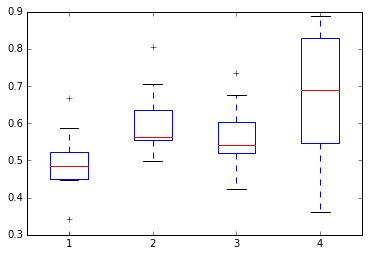

In [56]:
plt.boxplot(AccAll)
plt.show

# Classifier Specificity paper tests
* Note: Patients currently used are 1 2 5 6 8 11 14 15 16 19
* Current paper draft: Sessions 1,2,3 CBR are used for testing, Session 4 CBR as target
* **Impairment Specific**: is trained on all but one SCO and tested on the remaining CBR patient
* **Patient Specific**: is trained on all SCO data (for that patient) and tested on Sessions 1,2,3 of CBR for the same patients
* **Device-Specific**: trained using Leave One Session Out across sessions 1,2,3 of CBR data for that patient. That means the model is trained on Sessions 1,2 and tested on 3 (and then cycles through the combinations). Session 4 was left out for target data.

In [139]:
PatientCodes = np.array([1, 2, 5, 6, 8, 11, 14, 15, 16, 19])

## Impairment specific model (Leave one subject out)

In [58]:
ISpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] != s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #test on 3 CBR sessions
    Nclasses = len(train['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    ISpec_acc[k] = BAcc
    print 'Patient %s, Impairment specific (SCO) model - BAcc = %s'%(s,ISpec_acc[k])
    k = k+1

print 'Mean BAcc - Impairment Specific (SCO) = %s'%ISpec_acc.mean()    

Patient 1, Impairment specific (SCO) model - BAcc = 0.543984111501
Patient 2, Impairment specific (SCO) model - BAcc = 0.497768337469
Patient 5, Impairment specific (SCO) model - BAcc = 0.488253786099
Patient 6, Impairment specific (SCO) model - BAcc = 0.550538747842
Patient 8, Impairment specific (SCO) model - BAcc = 0.46746662647
Patient 11, Impairment specific (SCO) model - BAcc = 0.543220688805
Patient 14, Impairment specific (SCO) model - BAcc = 0.58054560037
Patient 15, Impairment specific (SCO) model - BAcc = 0.571897224455
Patient 16, Impairment specific (SCO) model - BAcc = 0.544442163861
Patient 19, Impairment specific (SCO) model - BAcc = 0.883598427716
Mean BAcc - Impairment Specific (SCO) = 0.567171571459


## Train on SCO and test on CBR (Patient Specific model) 

In [74]:
PSpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] == s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)]
    Nclasses = len(test['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    #acc = sum(ypred == ytest)/len(ytest)
    #balanced accuracy
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    
    BAcc = acc_c/len(np.unique(ytest))
    PSpec_acc[k] = BAcc
    print 'Patient %s, Nclasses = %s, Personal model (Trained on SCO) - BAcc = %s'%(s,Nclasses,PSpec_acc[k])
    k = k+1

print 'Mean BAcc - Patient Specific (SCO) = %s'%PSpec_acc.mean()    

Patient 1, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.690657930136
Patient 2, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.514201316211
Patient 5, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.641250439644
Patient 6, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.539390667014
Patient 8, Nclasses = 3, Personal model (Trained on SCO) - BAcc = 0.712432565372
Patient 11, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.48350570923
Patient 14, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.489253976453
Patient 15, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.413609989896
Patient 16, Nclasses = 5, Personal model (Trained on SCO) - BAcc = 0.489487962491
Patient 19, Nclasses = 3, Personal model (Trained on SCO) - BAcc = 0.780840989076
Mean BAcc - Patient Specific (SCO) = 0.575463154552


## Train and test on CBR - Device specific model (CBR)
* Leave One Session Out of CBR 
* Keep out 1 session (#4) for target

In [65]:
DSpec_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    data =  CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #keep out 1 session for target
    BAcc = 0
    for session in range(1,4):
                  
        test = data[data['Session'] == session]
        train = data[data['Session'] != session]
    
        Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

        Xtrain = train.select_columns(feature_cols).to_numpy()
        ytrain = train.select_columns(label_cols).to_numpy()
        ytrain = ytrain.reshape(-1)
        Xtest = test.select_columns(feature_cols).to_numpy()
        ytest = test.select_columns(label_cols).to_numpy()
        ytest = ytest.reshape(-1)

        RF = RandomForestClassifier(n_estimators=50)
        RF = RF.fit(Xtrain,ytrain)
        ypred = RF.predict(Xtest)
        #acc = sum(ypred == ytest)/len(ytest)
        #balanced accuracy
        acc_c = 0
        for c in np.unique(ytest):
            i = ytest == c
            correct = ypred[i] == ytest[i]
            acc_c += sum(correct)/len(correct)

        BAcc += acc_c/len(np.unique(ytest)) #for current session
        
    DSpec_acc[k] = BAcc/3 #the CV BAcc on 3 session 
    print 'Patient %s, Device Specific model - BAcc = %s'%(s,DSpec_acc[k])
    k = k+1

print 'Mean BAcc - Device Specific (CBR) = %s'%DSpec_acc.mean()    

Patient 1, Device Specific model - BAcc = 0.803518022125
Patient 2, Device Specific model - BAcc = 0.651113329939
Patient 5, Device Specific model - BAcc = 0.629395231577
Patient 6, Device Specific model - BAcc = 0.594012604338
Patient 8, Device Specific model - BAcc = 0.881942741734
Patient 11, Device Specific model - BAcc = 0.733450526503
Patient 14, Device Specific model - BAcc = 0.84999289801
Patient 15, Device Specific model - BAcc = 0.830651274766
Patient 16, Device Specific model - BAcc = 0.661073852136
Patient 19, Device Specific model - BAcc = 0.751907231714
Mean BAcc - Device Specific (CBR) = 0.738705771284


## Can we boost an impairment-specific model with the Device data?

In [71]:
ISpecSER_acc = np.zeros(len(PatientCodes)) 
ISpecSO_acc = np.zeros(len(PatientCodes)) 
k = 0
for s in PatientCodes:
    
    train = SCOData[(SCOData['SubjID'] != s)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 4)] #test on 3 CBR sessions
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 4)] 

    Nclasses = len(train['Label'].unique()) #How many activities we have for this patient

    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1)
    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    
    #balanced accuracy - Source only
    acc_c = 0
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)    
    ISpecSO_acc[k] = acc_c/len(np.unique(ytest))
    
    #combining source w target data
    newRF = SERfuncs.forest_convert(RF)
    expRF = SERfuncs.forest_SER(newRF,Xtarget,ytarget,C=Nclasses) #refine RF on current data (C is the # of classes on the source)
      
    #balanced accuracy
    acc_c = 0
    ypred = np.asarray(map(lambda x:SERfuncs.forest_classify_ensemble(expRF,x),Xtest))
    for c in np.unique(ytest):
        i = ytest == c
        correct = ypred[i] == ytest[i]
        acc_c += sum(correct)/len(correct)
    BAcc = acc_c/len(np.unique(ytest))
    ISpecSER_acc[k] = BAcc
        
    print 'Patient %s, BAcc Impairment specific only = %s, Bacc w SER = %s'%(s,ISpecSO_acc[k],ISpecSER_acc[k])
    k = k+1

print 'Mean BAcc - Impairment Specific only = %s'%ISpecSO_acc.mean()    
print 'Mean BAcc - Impairment Specific w SER = %s'%ISpecSER_acc.mean()    

Patient 1, BAcc Impairment specific only = 0.57835963364, Bacc w SER = 0.595887038601
Patient 2, BAcc Impairment specific only = 0.496082636568, Bacc w SER = 0.501462995569
Patient 5, BAcc Impairment specific only = 0.482115943604, Bacc w SER = 0.498647282775
Patient 6, BAcc Impairment specific only = 0.563228464701, Bacc w SER = 0.612659708275
Patient 8, BAcc Impairment specific only = 0.46743938817, Bacc w SER = 0.752075664297
Patient 11, BAcc Impairment specific only = 0.545551923753, Bacc w SER = 0.559630930743
Patient 14, BAcc Impairment specific only = 0.616396651843, Bacc w SER = 0.616396651843
Patient 15, BAcc Impairment specific only = 0.588985299386, Bacc w SER = 0.617322711911
Patient 16, BAcc Impairment specific only = 0.532580984444, Bacc w SER = 0.540313477055
Patient 19, BAcc Impairment specific only = 0.891267425385, Bacc w SER = 0.891267425385
Mean BAcc - Impairment Specific only = 0.576200835149
Mean BAcc - Impairment Specific w SER = 0.618566388645


No significant boost 

<function matplotlib.pyplot.show>

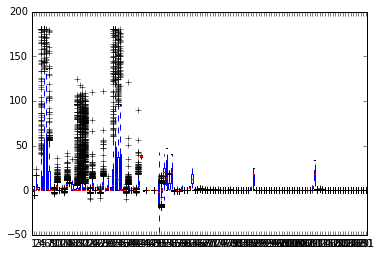

In [75]:
plt.boxplot(Xtrain)
plt.show
